## Predição de Diagnóstico de Transtorno de Ansiedade - Trabalho Prático II
#### Inteligência Artificial - PUC Campos Lurdes - Ciência da Computação - 2024/2 
Grupo 9 - André Santos Alves, Luana Policarpo, Igor Vidal, Joäo Pedro Rosa

## Extração

#### Importação da base 

In [1]:
import pandas as pd

chunks = []
for chunk in pd.read_csv("pns2019.csv", chunksize=10000):
    chunks.append(chunk)

base = pd.concat(chunks)
display(base)
chunks = chunk = None

V0001    V0024    UPA_PNS  V0006_PNS  V0015  V0020  V0022  V0026  \
0          11  1110011  110000016          1      1   2019    6.0      1   
1          11  1110011  110000016          1      1   2019    6.0      1   
2          11  1110011  110000016          1      1   2019    6.0      1   
3          11  1110011  110000016          1      1   2019    6.0      1   
4          11  1110011  110000016          1      1   2019    6.0      1   
...       ...      ...        ...        ...    ...    ...    ...    ...   
293721     53  5310220  530044434         14      1   2019    4.0      2   
293722     53  5310220  530044434         14      1   2019    4.0      2   
293723     53  5310220  530044434         14      1   2019    4.0      2   
293724     53  5310220  530044434         14      1   2019    4.0      2   
293725     53  5310220  530044434         15      8   2019    NaN      2   

        V0031  V0025A  ...  VDE002  VDE014   VDF002  VDF003  VDF004  VDL001  \
0           1     1.0  ...     1.0     6.0   2098.0   350.0     2.0     NaN   
1           1     0.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
2           1     0.0  ...     1.0     4.0   2098.0   350.0     2.0     NaN   
3           1     9.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
4           1     9.0  ...     NaN     NaN   2098.0   350.0     2.0     NaN   
...       ...     ...  ...     ...     ...      ...     ...     ...     ...   
293721      1     0.0  ...     1.0     1.0  13390.0  3348.0     6.0     NaN   
293722      1     1.0  ...     NaN     NaN  13390.0  3348.0     6.0     NaN   
293723      1     0.0  ...     1.0     7.0  13390.0  3348.0     6.0     NaN   
293724      1     9.0  ...     NaN     NaN  13390.0  3348.0     6.0     NaN   
293725      1     NaN  ...     NaN     NaN      NaN     NaN     NaN     NaN   

        VDM001  VDP001  VDR001    VDDATA  
0          NaN     NaN     NaN  20210825  
1          NaN     NaN     NaN  20210825  
2          NaN     NaN     NaN  20210825  
3          NaN     NaN     NaN  20210825  
4          NaN     NaN     NaN  20210825  
...        ...     ...     ...       ...  
293721     NaN     NaN     NaN  20210825  
293722     NaN     NaN     NaN  20210825  
293723     NaN     NaN     NaN  20210825  
293724     NaN     NaN     NaN  20210825  
293725     NaN     NaN     NaN  20210825  

[293726 rows x 1087 columns]

#### Importação do dicionário de valores

In [2]:
from pns_dictionary import dictionary

dictionary

{'Módulo A - Informações do Domicílio': Module(name='Módulo A - Informações do Domicílio', columns={'A001': Column(name='Tipo do domicílio', old_name='A001', values_dict={'1': 'Casa', '2': 'Apartamento', '3': 'Habitação em casa de cômodos, cortiço ou cabeça de porco', '9': 'Ignorado'}), 'A002010': Column(name='Qual é o material que predomina na construção das paredes externas deste domicílio?', old_name='A002010', values_dict={'1': 'Alvenaria com revestimento ou taipa revestida', '2': 'Alvenaria sem revestimento', '3': 'Taipa sem revestimento', '4': 'Madeira apropriada para construção (aparelhada)', '5': 'Madeira aproveitada', '6': 'Outro material', '9': 'Ignorado'}), 'A003010': Column(name='Material predominante na cobertura (telhado) do domicílio', old_name='A003010', values_dict={'1': 'Telha sem laje de concreto', '2': 'Telha com laje de concreto', '3': 'Somente laje de concreto', '4': 'Madeira apropriada para construção (aparelhada)', '5': 'Zinco, alumínio ou chapa metálica', '6': 

## Transformação

### Redução da base para colunas de interesse

#### Características do residente

In [3]:
resident_df = (
    dictionary["Módulo C - Características gerais dos moradores"]
    .get_module_dataframe(base)
    .loc[
        :,
        [
            "Cor ou raça",
            "Sexo",
            "Qual é o estado civil de ___?",
        ],
    ]
)

resident_df

Cor ou raça    Sexo Qual é o estado civil de ___?
0           Branca  Mulher                     Casado(a)
1            Parda   Homem                     Casado(a)
2            Preta   Homem                   Solteiro(a)
3            Preta   Homem                           NaN
4            Parda  Mulher                           NaN
...            ...     ...                           ...
293721       Preta  Mulher                   Solteiro(a)
293722       Parda   Homem                      Viúvo(a)
293723      Branca   Homem                   Solteiro(a)
293724       Parda  Mulher                   Solteiro(a)
293725         NaN     NaN                           NaN

[293726 rows x 3 columns]

#### Trabalho

In [4]:
work_df: pd.DataFrame = (
    dictionary[
        "Módulo E - Características de trabalho das pessoas de 14 anos ou mais de idade"
    ]
    .get_module_dataframe(base)
    .drop(
        [
            "Na semana de ___ a ___ (semana de referência), ___ tinha algum trabalho remunerado do qual estava temporariamente afastado",
            "Na semana de ___ a ___ (semana de referência), por que motivo ___ estava afastado desse trabalho",
            "A doença ou acidente foi relacionado ao trabalho?",
            "Em ___ /___ /___ (último dia da semana de referência), fazia quanto tempo que ___ estava afastado desse trabalho",
            "Tempo que estava afastado (De 1 mês a menos de 1 ano)",
            "Tempo que estava afastado (De 1 ano a menos de 2 anos)",
            "Tempo que estava afastado (De 2 anos a 98 anos)",
            "Trabalhador não remunerado em ajuda a membro do domicílio ou parente",
            "Nesse trabalho, ___era servidor público estatutário (federal, estadual ou municipal)",
            "Qual era a principal atividade desse negócio/empresa",
            "...recebia/fazia normalmente nesse trabalho rendimento/retirada em dinheiro?",
            "Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse trabalho?(valor em dinheiro)",
            "...recebia/fazia normalmente nesse trabalho rendimento/retirada em produtos ou mercadorias?",
            "Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse trabalho?(valor estimado em produtos ou mercadorias)",
            "...recebia/fazia normalmente nesse trabalho rendimento/retirada somente em benefícios ?",
            "Quantas horas ___ trabalhava normalmente, por semana, nesse trabalho?",
            "...recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada em dinheiro?",
            "Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse(s) outro(s) trabalho(s)?(valor em dinheiro)",
            "...recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada em produtos ou mercadorias?",
            "Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse(s) outro(s) trabalho(s)?(valor estimado em produtos ou mercadorias)",
            "...recebia/fazia normalmente nesse(s) outro(s) trabalho(s) rendimento/retirada somente em benefícios ?",
            "Quantas horas ___ trabalhava normalmente, por semana, nesses outros trabalhos?",
            "No período de ___ a ___ (período de referência de 30 dias), qual foi a principal providência que ___ tomou para conseguir trabalho?",
            "Quanto tempo depois de __/__/__ (último dia da semana de referência) ___ irá começar esse trabalho que conseguiu?",
            "Número de meses para começar o trabalho que conseguiu.",
            "Até o dia ___ (último dia da semana de referência), fazia quanto tempo que___ estava sem qualquer trabalho e tentando conseguir trabalho?",
            "fazia quanto tempo que vinha procurando trabalho (de 1 mês a menos de 1 ano)",
            "fazia quanto tempo que vinha procurando trabalho (de 1 ano a menos de 2 anos)",
            "fazia quanto tempo vinha procurando trabalho (2 anos ou mais)",
            "Se tivesse conseguido um trabalho ___ poderia ter começado a trabalhar na semana de___ a ___ (semana de referência)",
            ". Na semana de___a___ (semana de referência), ___ qual foi o total de horas que dedicou às atividades de cuidados de pessoas e/ou afazeres domésticos?",
            "Qual era a ocupação (cargo ou função) que ___ tinha nesse trabalho",
            "Informante do Módulo E",
        ],
        axis=1,
    )
)

work_df

Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                     Sim                                                                                                
1                                                     Não                                                                                                
2                                                     Sim                                                                                                
3                                                     NaN                                                                                                
4                                                     NaN                                                                                                
...                                                   ...                                                                                                
293721                                                Sim                                                                                                
293722                                                Não                                                                                                
293723                                                Sim                                                                                                
293724                                                NaN                                                                                                
293725                                                NaN                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                     NaN                                                                                                                                                                   
1                                                     Não                                                                                                                                                                   
2                                                     NaN                                                                                                                                                                   
3                                                     NaN                                                                                                                                                                   
4                                                     NaN                                                                                                                                                                   
...                                                   ...                                                                                                                                                                   
293721                                                NaN                                                                                                                                                                   
293722                                                Não                                                                                                                                                                   
293723                                                NaN                                                                                                                

#### Diagnóstico de doença mental

In [5]:
health_df: pd.DataFrame = dictionary[
    "Módulo Q - Doenças crônicas"
].get_module_dataframe(base)[
    "Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?"
]

health_df

0         Não
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
293721    NaN
293722    NaN
293723    NaN
293724    NaN
293725    NaN
Name: Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?, Length: 293726, dtype: object

#### Criação da base tratada

In [6]:
base = None
treated_df = pd.concat((resident_df, work_df, health_df), axis=1).dropna(
    subset=[
        "Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?"
    ]
)
resident_df = work_df = health_df = dictionary = None

treated_df

Cor ou raça    Sexo                      Qual é o estado civil de ___?  \
0           Branca  Mulher                                          Casado(a)   
9            Parda  Mulher                                        Solteiro(a)   
10           Preta  Mulher                                        Solteiro(a)   
18           Preta  Mulher                                           Viúvo(a)   
19           Parda  Mulher                                        Solteiro(a)   
...            ...     ...                                                ...   
293709       Parda  Mulher                                          Casado(a)   
293712       Parda   Homem  Divorciado(a) ou desquitado(a) ou separado(a) ...   
293713       Parda  Mulher                                          Casado(a)   
293718       Parda   Homem                                          Casado(a)   
293720      Branca   Homem                                        Solteiro(a)   

       Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                     Sim                                                                                                
9                                                     Sim                                                                                                
10                                                    Sim                                                                                                
18                                                    Sim                                                                                                
19                                                    Não                                                                                                
...                                                   ...                                                                                                
293709                                                Sim                                                                                                
293712                                                Sim                                                                                                
293713                                                Não                                                                                                
293718                                                Sim                                                                                                
293720                                                Sim                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                     NaN                                                                                                                                                                   
9                                                     NaN                                                                                                                                                                   
10                                                    NaN                                                                                                                                                                   
18                                                    NaN                                                                                                                                                                   
19                                                    Não                       

#### Preenchendo valores nulos

In [7]:
columns = (
    "Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc",
    "Na semana de ___ a ___ (semana de referência), ___ fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora",
    "Na semana de ___ a ___ (semana de referência), ___ ajudou durante pelo menos 1 hora, sem receber pagamento, no trabalho remunerado de algum morador do domicílio ou de parente",
)

for column in columns:
    treated_df.loc[:, column] = treated_df[column].fillna("Não")

columns = (
    "Nesse trabalho, ___ era",
    "Nesse trabalho, ___tinha carteira de trabalho assinada",
    "No período de ___ a ___ (período de referência de 30 dias), ___ tomou alguma providência para conseguir trabalho, seja um emprego ou um negócio próprio?",
    "Qual foi o principal motivo de ___ não ter tomado providência para conseguir trabalho no período de ___ a ___ (período de referência de 30 dias)?",
    "No período de ___ a ___ (período de referência de 358 dias), ___ trabalhou, por pelo menos 1 hora?",
)

for column in columns:
    treated_df.loc[:, column] = treated_df[column].fillna("Não se aplica")

column = "Quantos trabalhos ___tinha na semana de ___ a ___"
treated_df.loc[:, column] = treated_df[column].fillna(0)

treated_df

Cor ou raça    Sexo                      Qual é o estado civil de ___?  \
0           Branca  Mulher                                          Casado(a)   
9            Parda  Mulher                                        Solteiro(a)   
10           Preta  Mulher                                        Solteiro(a)   
18           Preta  Mulher                                           Viúvo(a)   
19           Parda  Mulher                                        Solteiro(a)   
...            ...     ...                                                ...   
293709       Parda  Mulher                                          Casado(a)   
293712       Parda   Homem  Divorciado(a) ou desquitado(a) ou separado(a) ...   
293713       Parda  Mulher                                          Casado(a)   
293718       Parda   Homem                                          Casado(a)   
293720      Branca   Homem                                        Solteiro(a)   

       Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                     Sim                                                                                                
9                                                     Sim                                                                                                
10                                                    Sim                                                                                                
18                                                    Sim                                                                                                
19                                                    Não                                                                                                
...                                                   ...                                                                                                
293709                                                Sim                                                                                                
293712                                                Sim                                                                                                
293713                                                Não                                                                                                
293718                                                Sim                                                                                                
293720                                                Sim                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                     Não                                                                                                                                                                   
9                                                     Não                                                                                                                                                                   
10                                                    Não                                                                                                                                                                   
18                                                    Não                                                                                                                                                                   
19                                                    Não                       

#### Remoção de linhas vazias
Como foram encontradas poucas linhas sem informação, optamos pela remoção.

In [8]:
treated_df = treated_df.dropna()
treated_df

Cor ou raça    Sexo                      Qual é o estado civil de ___?  \
0           Branca  Mulher                                          Casado(a)   
9            Parda  Mulher                                        Solteiro(a)   
10           Preta  Mulher                                        Solteiro(a)   
19           Parda  Mulher                                        Solteiro(a)   
22           Parda  Mulher                                          Casado(a)   
...            ...     ...                                                ...   
293702       Parda  Mulher                                        Solteiro(a)   
293709       Parda  Mulher                                          Casado(a)   
293712       Parda   Homem  Divorciado(a) ou desquitado(a) ou separado(a) ...   
293713       Parda  Mulher                                          Casado(a)   
293718       Parda   Homem                                          Casado(a)   

       Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                     Sim                                                                                                
9                                                     Sim                                                                                                
10                                                    Sim                                                                                                
19                                                    Não                                                                                                
22                                                    Sim                                                                                                
...                                                   ...                                                                                                
293702                                                Não                                                                                                
293709                                                Sim                                                                                                
293712                                                Sim                                                                                                
293713                                                Não                                                                                                
293718                                                Sim                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                     Não                                                                                                                                                                   
9                                                     Não                                                                                                                                                                   
10                                                    Não                                                                                                                                                                   
19                                                    Não                                                                                                                                                                   
22                                                    Não                       

### Encoding

In [9]:
target_column = "Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?"

one_hot_columns = [
    "Cor ou raça",
    "Sexo",
    "Qual é o estado civil de ___?",
    "Nesse trabalho, ___ era",
    "Nesse trabalho, ___tinha carteira de trabalho assinada",
    "No período de ___ a ___ (período de referência de 30 dias), ___ tomou alguma providência para conseguir trabalho, seja um emprego ou um negócio próprio?",
    "Qual foi o principal motivo de ___ não ter tomado providência para conseguir trabalho no período de ___ a ___ (período de referência de 30 dias)?",
    "No período de ___ a ___ (período de referência de 358 dias), ___ trabalhou, por pelo menos 1 hora?",
]

boolean_columns = list(
    filter(lambda c: c not in one_hot_columns and c != target_column, treated_df.columns.values)
)
treated_df = pd.get_dummies(treated_df, columns=one_hot_columns)
treated_df

Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                     Sim                                                                                                
9                                                     Sim                                                                                                
10                                                    Sim                                                                                                
19                                                    Não                                                                                                
22                                                    Sim                                                                                                
...                                                   ...                                                                                                
293702                                                Não                                                                                                
293709                                                Sim                                                                                                
293712                                                Sim                                                                                                
293713                                                Não                                                                                                
293718                                                Sim                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                     Não                                                                                                                                                                   
9                                                     Não                                                                                                                                                                   
10                                                    Não                                                                                                                                                                   
19                                                    Não                                                                                                                                                                   
22                                                    Não                                                                                                                                                                   
...                                                   ...                                                                                                                                                                   
293702                                                Não                                                                                                                                                                   
293709                                                Não                                                                                                                                                                   
293712                                                Não                                                                                                                

In [10]:
from typing import Callable

parse_columns: Callable[[pd.DataFrame], bool] = lambda c: c.apply(lambda v: v == "Sim")

treated_df.loc[:, boolean_columns] = treated_df[boolean_columns].apply(parse_columns)
treated_df

Na semana de___ a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em dinheiro  \
0                                                    True                                                                                                
9                                                    True                                                                                                
10                                                   True                                                                                                
19                                                  False                                                                                                
22                                                   True                                                                                                
...                                                   ...                                                                                                
293702                                              False                                                                                                
293709                                               True                                                                                                
293712                                               True                                                                                                
293713                                              False                                                                                                
293718                                               True                                                                                                

       Na semana de ___a___ (semana de referência), ___ trabalhou ou estagiou, durante pelo menos uma hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, treinamento ou aprendizado etc  \
0                                                   False                                                                                                                                                                   
9                                                   False                                                                                                                                                                   
10                                                  False                                                                                                                                                                   
19                                                  False                                                                                                                                                                   
22                                                  False                                                                                                                                                                   
...                                                   ...                                                                                                                                                                   
293702                                              False                                                                                                                                                                   
293709                                              False                                                                                                                                                                   
293712                                              False                                                                                                                

## Processamento

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X = treated_df.drop(target_column, axis=1)
y = treated_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_tree = grid_search.best_estimator_

plt.figure(figsize=(500,125))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=y.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=24,
    proportion=True,
)
plt.show()

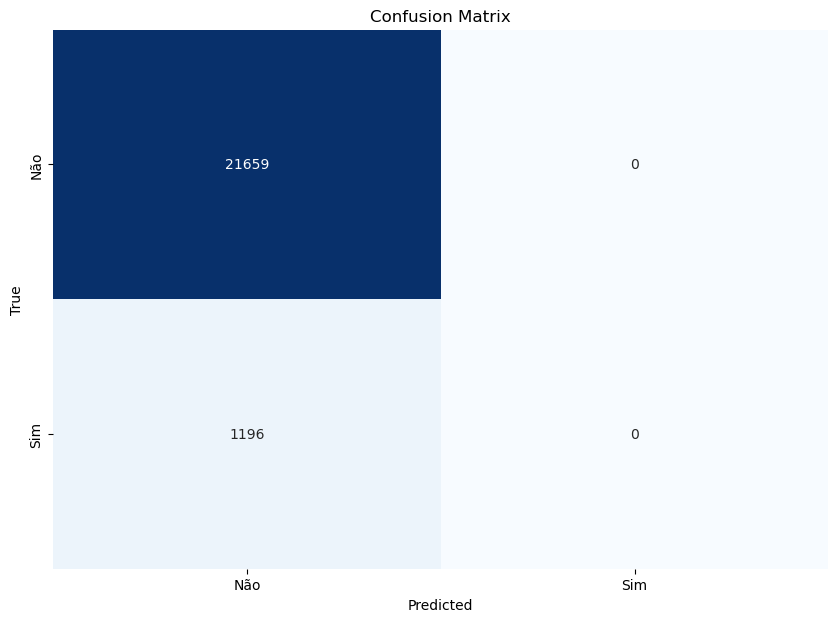

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=best_tree.classes_,
    yticklabels=best_tree.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [14]:
print(grid_search.score(X_test, y_test))

0.9476700940713192
